<ipython-input-1-865af3860942>:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
<ipython-input-1-865af3860942>:57: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)


No missing values detected.


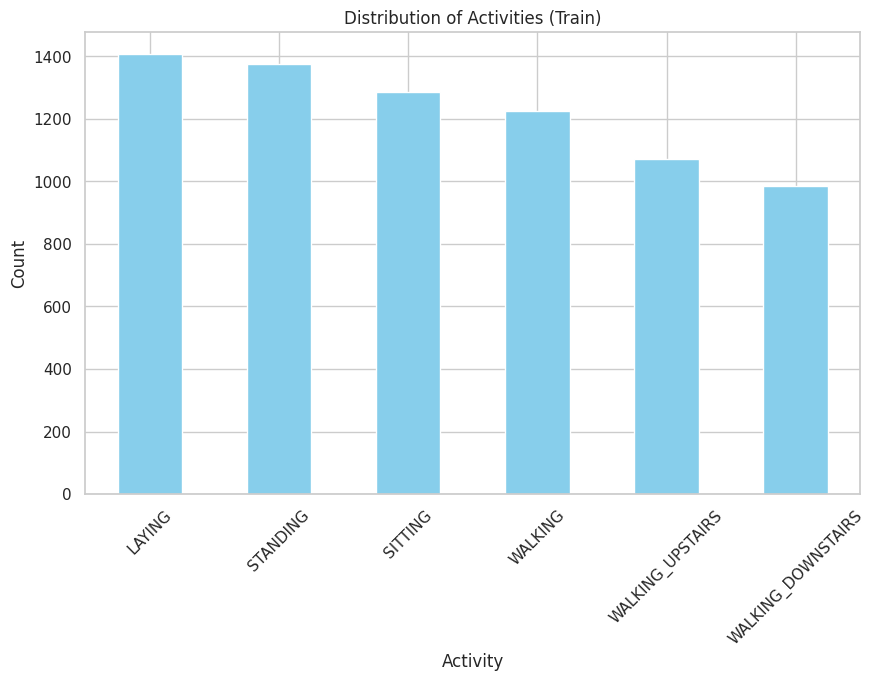

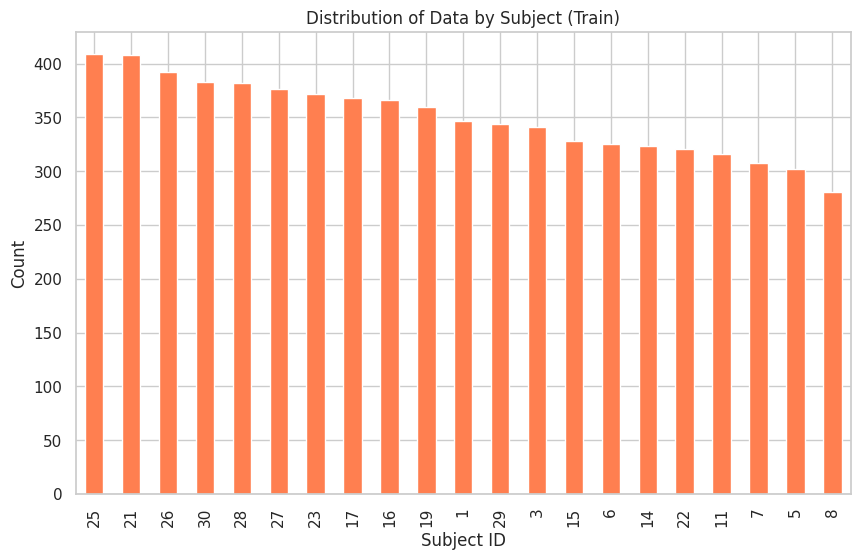

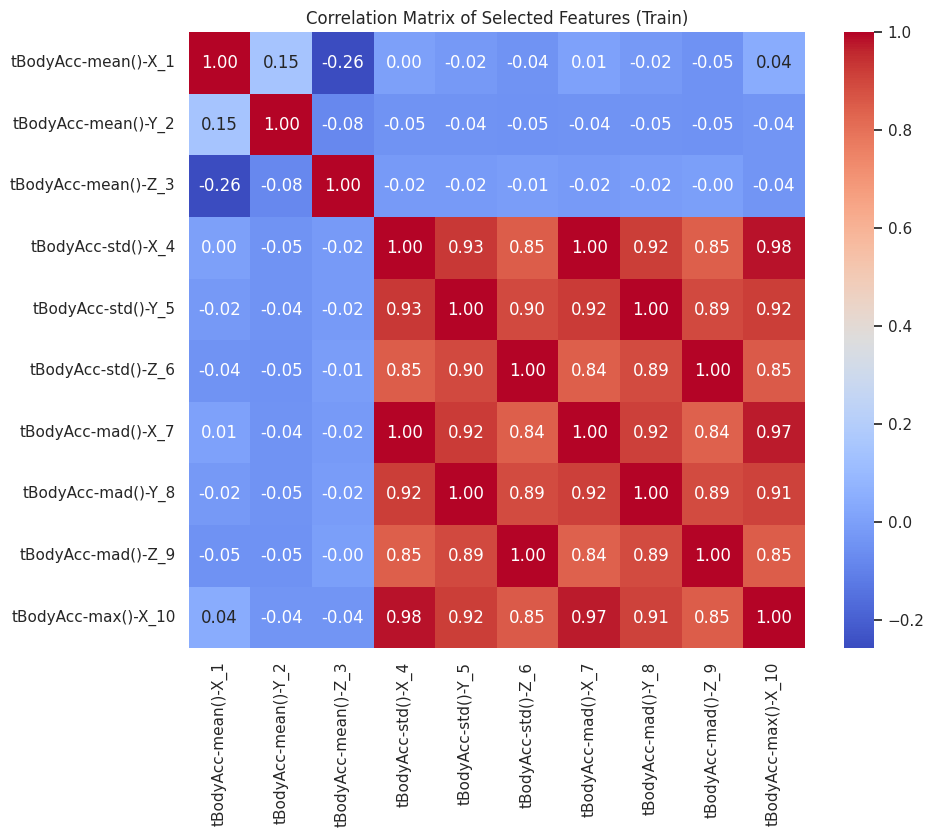

Cleaned training and testing datasets saved separately.


In [1]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Configure visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Step 2: Extract and load the train/test data
# Define the path to the zip file
zip_file_path = '/content/human+activity+recognition+using+smartphones.zip'
extract_dir = '/mnt/data/extracted_har_dataset'

# Extract the top-level zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check if the extracted directory contains another zip
nested_zip_path = os.path.join(extract_dir, 'UCI HAR Dataset.zip')
if os.path.exists(nested_zip_path):
    with zipfile.ZipFile(nested_zip_path, 'r') as nested_zip:
        nested_zip.extractall(extract_dir)

# Define paths to the extracted files
base_dir = os.path.join(extract_dir, 'UCI HAR Dataset')
activity_labels_path = os.path.join(base_dir, 'activity_labels.txt')
features_path = os.path.join(base_dir, 'features.txt')

subject_train_path = os.path.join(base_dir, 'train', 'subject_train.txt')
X_train_path = os.path.join(base_dir, 'train', 'X_train.txt')
y_train_path = os.path.join(base_dir, 'train', 'y_train.txt')

subject_test_path = os.path.join(base_dir, 'test', 'subject_test.txt')
X_test_path = os.path.join(base_dir, 'test', 'X_test.txt')
y_test_path = os.path.join(base_dir, 'test', 'y_test.txt')

# Load files
try:
    target_names = pd.read_csv(activity_labels_path, header=None, sep=' ', names=['id', 'activity'])
    features = pd.read_csv(features_path, header=None, sep=' ', names=['id', 'feature_name'])

    # Handle duplicate feature names by appending unique identifiers
    unique_features = features['feature_name'] + '_' + features['id'].astype(str)

    subject_train = pd.read_csv(subject_train_path, header=None, names=['subject'])
    X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
    X_train.columns = unique_features
    y_train = pd.read_csv(y_train_path, header=None, names=['activity'])

    subject_test = pd.read_csv(subject_test_path, header=None, names=['subject'])
    X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)
    X_test.columns = unique_features
    y_test = pd.read_csv(y_test_path, header=None, names=['activity'])

except FileNotFoundError as e:
    print(f"File not found: {e}")
    raise
except ValueError as e:
    print(f"Error with loading data: {e}")
    raise

# Combine train/test datasets separately
train_data = pd.concat([subject_train, y_train, X_train], axis=1)
test_data = pd.concat([subject_test, y_test, X_test], axis=1)

# Step 3: Perform data cleaning
# Check for missing values
if train_data.isnull().sum().sum() == 0 and test_data.isnull().sum().sum() == 0:
    print("No missing values detected.")
else:
    print("Missing values detected and need handling.")

# Step 4: Basic exploratory visualizations
# Activity distribution (Training Set)
plt.figure(figsize=(10, 6))
activity_counts = train_data['activity'].map(target_names.set_index('id')['activity']).value_counts()
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Activities (Train)')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Subject distribution (Training Set)
plt.figure(figsize=(10, 6))
subject_counts = train_data['subject'].value_counts()
subject_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Data by Subject (Train)')
plt.xlabel('Subject ID')
plt.ylabel('Count')
plt.show()

# Step 5: Correlation matrix (Train Set)
corr_subset = train_data.iloc[:, 2:12].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Selected Features (Train)')
plt.show()

# Step 6: Prepare data for machine learning (splitting separately)
X_train = train_data.iloc[:, 2:]
y_train = train_data['activity']

X_test = test_data.iloc[:, 2:]
y_test = test_data['activity']

# Save the cleaned data separately
train_cleaned_path = '/mnt/data/train_cleaned.csv'
test_cleaned_path = '/mnt/data/test_cleaned.csv'
train_data.to_csv(train_cleaned_path, index=False)
test_data.to_csv(test_cleaned_path, index=False)

print("Cleaned training and testing datasets saved separately.")
